In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"/Users/yeji/SWING 2023 해커톤 with LONDON/전처리데이터")
미세먼지_df = pd.read_csv("전체_미세먼지언급량_월별.csv", engine="python")

In [3]:
미세먼지_df

,년도,월,언급량
0,2010,1,0
1,2010,2,0
2,2010,3,0
3,2010,4,0
4,2010,5,0
...,...,...,...
139,2021,8,2
140,2021,9,3
141,2021,10,18
142,2021,11,38


In [4]:
미세먼지_df['월'] = 미세먼지_df['월'].apply(lambda x: str(x).zfill(2))

In [5]:
미세먼지_df

,년도,월,언급량
0,2010,01,0
1,2010,02,0
2,2010,03,0
3,2010,04,0
4,2010,05,0
...,...,...,...
139,2021,08,2
140,2021,09,3
141,2021,10,18
142,2021,11,38


In [6]:
미세먼지_df.dtypes

년도      int64
월      object
언급량     int64
dtype: object

In [7]:
아토피_df = pd.read_csv("아토피_시군구통합_연령군5.csv", engine="python")

In [8]:
아토피_df

,요양개시년월,진료수
0,201001,1480
1,201002,1340
2,201003,1644
3,201004,1525
4,201005,1517
...,...,...
139,202108,3826
140,202109,3712
141,202110,3848
142,202111,3439


In [9]:
아토피_df = 아토피_df.astype({'요양개시년월':'string'})
아토피_df.dtypes

요양개시년월    string[python]
진료수                int64
dtype: object

In [10]:
아토피_df["년"]=아토피_df["요양개시년월"].str[0:4]
아토피_df["월"]=아토피_df["요양개시년월"].str[4:]

In [11]:
아토피_df

,요양개시년월,진료수,년,월
0,201001,1480,2010,01
1,201002,1340,2010,02
2,201003,1644,2010,03
3,201004,1525,2010,04
4,201005,1517,2010,05
...,...,...,...,...
139,202108,3826,2021,08
140,202109,3712,2021,09
141,202110,3848,2021,10
142,202111,3439,2021,11


In [12]:
아토피_df = 아토피_df.drop(['요양개시년월'],axis=1)

In [13]:
아토피_df = 아토피_df.rename(columns={'합계 : 진료에피소드 건수' : '진료수'})

In [14]:
아토피_df

,진료수,년,월
0,1480,2010,01
1,1340,2010,02
2,1644,2010,03
3,1525,2010,04
4,1517,2010,05
...,...,...,...
139,3826,2021,08
140,3712,2021,09
141,3848,2021,10
142,3439,2021,11


In [15]:
아토피_df = 아토피_df.rename(columns={'년' : '년도'})

In [16]:
아토피_df

,진료수,년도,월
0,1480,2010,01
1,1340,2010,02
2,1644,2010,03
3,1525,2010,04
4,1517,2010,05
...,...,...,...
139,3826,2021,08
140,3712,2021,09
141,3848,2021,10
142,3439,2021,11


In [17]:
아토피_df.dtypes

진료수             int64
년도     string[python]
월      string[python]
dtype: object

In [18]:
미세먼지_df

,년도,월,언급량
0,2010,01,0
1,2010,02,0
2,2010,03,0
3,2010,04,0
4,2010,05,0
...,...,...,...
139,2021,08,2
140,2021,09,3
141,2021,10,18
142,2021,11,38


In [19]:
아토피_df

,진료수,년도,월
0,1480,2010,01
1,1340,2010,02
2,1644,2010,03
3,1525,2010,04
4,1517,2010,05
...,...,...,...
139,3826,2021,08
140,3712,2021,09
141,3848,2021,10
142,3439,2021,11


In [20]:
new_df = 미세먼지_df
new_df['진료수']=0
new_df

,년도,월,언급량,진료수
0,2010,01,0,0
1,2010,02,0,0
2,2010,03,0,0
3,2010,04,0,0
4,2010,05,0,0
...,...,...,...,...
139,2021,08,2,0
140,2021,09,3,0
141,2021,10,18,0
142,2021,11,38,0


In [21]:
for i in range(144):
     new_df.iloc[i,3] = 아토피_df.iloc[i,0]
new_df

,년도,월,언급량,진료수
0,2010,01,0,1480
1,2010,02,0,1340
2,2010,03,0,1644
3,2010,04,0,1525
4,2010,05,0,1517
...,...,...,...,...
139,2021,08,2,3826
140,2021,09,3,3712
141,2021,10,18,3848
142,2021,11,38,3439


In [26]:
index = new_df[new_df['년도'] >= 2020].index
new_df = new_df.drop(index)

In [27]:
new_df

,년도,월,언급량,진료수
0,2010,01,0,1480
1,2010,02,0,1340
2,2010,03,0,1644
3,2010,04,0,1525
4,2010,05,0,1517
...,...,...,...,...
115,2019,08,8,3683
116,2019,09,3,3518
117,2019,10,40,3674
118,2019,11,60,3355


In [37]:
new2_df = new_df.astype({'월':'int'})
new2_df

,년도,월,언급량,진료수
0,2010,1,0,1480
1,2010,2,0,1340
2,2010,3,0,1644
3,2010,4,0,1525
4,2010,5,0,1517
...,...,...,...,...
115,2019,8,8,3683
116,2019,9,3,3518
117,2019,10,40,3674
118,2019,11,60,3355


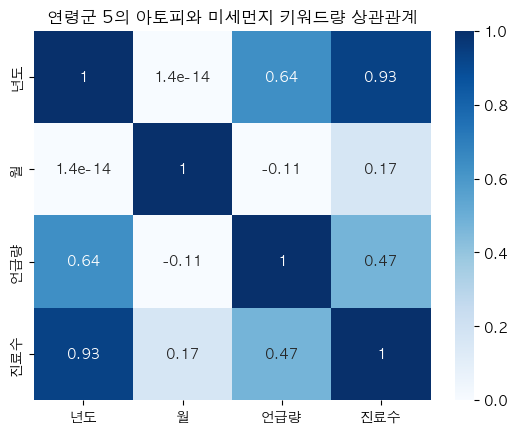

In [39]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = new2_df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = True, cmap=plt.cm.Blues, vmin = 0, vmax=1.0)  
plt.title('연령군 5의 아토피와 미세먼지 키워드량 상관관계')
plt.show()

In [40]:
cor_target_abs0 = cor['진료수'].sort_values(ascending=False)
print(cor_target_abs0)

진료수    1.000000
년도     0.930130
언급량    0.474529
월      0.165609
Name: 진료수, dtype: float64
